In [3]:
#importing the necessary libraries

import numpy as np
import io
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from google.colab import output, drive, files

In [4]:
#Input Dataset

# you can download the dataset from here: https://drive.google.com/file/d/1iawELUECqUqj8msfTiFnJTxXaXdpYG47/view?usp=sharing
uploaded = files.upload()

Saving MobilePhonePrice.csv to MobilePhonePrice.csv


In [5]:
#Exploratory Data Analysis

#Statistical analysis of the dataset (mean, mode and median)

# Read the CSV file
df = pd.read_csv(io.BytesIO(uploaded['MobilePhonePrice.csv']))

print(df.describe())

print("\n")

# Calculate mean
mean = df['Price ($)'].mean()

# Calculate mode
mode = df['Price ($)'].mode().values[0]

# Calculate median
median = df['Price ($)'].median()

print("Mean Price:",  f"${mean}")
print("Mode Price:", f"${mode}")
print("Median Price:", f"${median}")

print("\n")

# Calculate mean
mean = df['Storage'].mean()

# Calculate mode
mode = df['Storage'].mode().values[0]

# Calculate median
median = df['Storage'].median()

print("Mean Storage:",  f"{mean} GB")
print("Mode Storage:", f"{mode} GB")
print("Median Storage:", f"{median} GB")



          Storage         RAM  Screen Size (inches)  Battery Capacity (mAh)  \
count  407.000000  407.000000            407.000000              407.000000   
mean   123.046683    5.837838              6.471253             4676.476658   
std     64.963160    2.431980              0.320542              797.193713   
min     32.000000    2.000000              4.500000             1821.000000   
25%     64.000000    4.000000              6.440000             4300.000000   
50%    128.000000    6.000000              6.500000             5000.000000   
75%    128.000000    8.000000              6.590000             5000.000000   
max    512.000000   16.000000              7.600000             7000.000000   

         Price ($)  
count   407.000000  
mean    408.314496  
std     299.684768  
min      99.000000  
25%     199.000000  
50%     299.000000  
75%     499.000000  
max    1999.000000  


Mean Price: $408.3144963144963
Mode Price: $199
Median Price: $299.0


Mean Storage: 123.04668304

 This following code performs exploratory data analysis (EDA) on a dataset using the pandas library. Here's a breakdown of the code and its purpose:

1. Exploratory Data Analysis:
   - EDA is a crucial step in data analysis where we explore and summarize the main characteristics of a dataset. It helps us understand the data, identify patterns, and gain insights.

2. Statistical analysis of the dataset:
   - The describe() method in pandas is used to generate descriptive statistics of the dataset, such as count, mean, standard deviation, minimum, and maximum values, as well as quartiles.

3. Reading the CSV file:
   - The line "df = pd.read_csv(io.BytesIO(uploaded['MobilePhonePrice.csv']))" reads the CSV file 'MobilePhonePrice.csv' uploaded earlier using the files.upload() utility. The file content is read into a pandas DataFrame called 'df'.

4. Statistical analysis of the 'Price' column:
   - The code calculates the mean, mode, and median values of the 'Price' column in the DataFrame 'df'.
   - The mean is computed using the mean() method.
   - The mode is calculated using the mode() method, and the .values[0] indexing is used to extract the mode value from the resulting Series.
   - The median is obtained using the median() method.

5. Printing the statistical results for 'Price' column:
   - The calculated mean, mode, and median values for the 'Price' column are printed.

6. Statistical analysis of the 'Storage' column:
   - Similar to the 'Price' column, the code calculates the mean, mode, and median values of the 'Storage' column in the DataFrame 'df'.

7. Printing the statistical results for 'Storage' column:
   - The calculated mean, mode, and median values for the 'Storage' column are printed.

The code performs basic statistical analysis on the 'Price' and 'Storage' columns of the dataset, providing insights into their central tendencies. It helps summarize the dataset's characteristics and facilitates a better understanding of the data.


Popular brands in our dataset


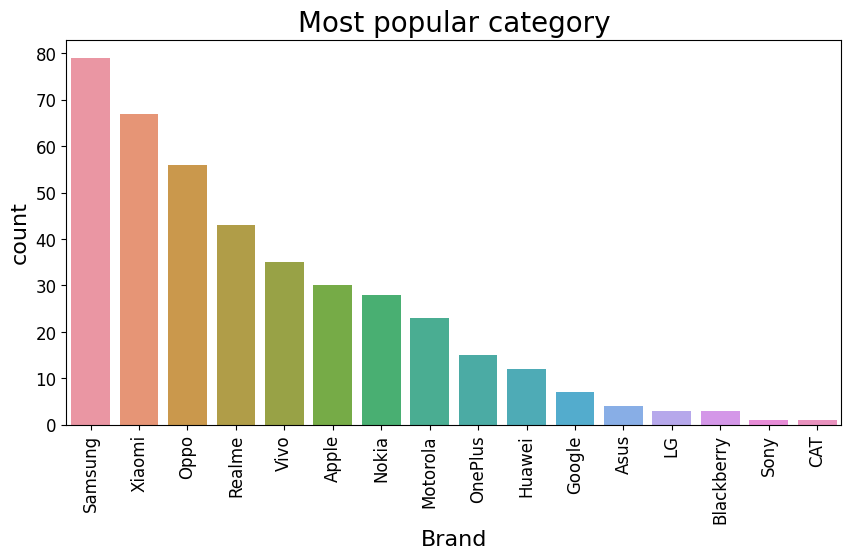

In [6]:
#Graphical visualizations of the dataset

#1. Popular brands in our dataset
print("Popular brands in our dataset")
data = pd.read_csv(io.BytesIO(uploaded['MobilePhonePrice.csv']))
counts = data['Brand'].value_counts().reset_index().rename(columns={'index': 'Brand', 'Brand': 'count'})
plt.figure(figsize=(10, 5))
sns.barplot(x="Brand", y="count", data = counts, order=counts.sort_values('count', ascending=False)['Brand'].head(50))
plt.xticks(rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)
plt.title("Most popular category", fontsize=20)
plt.xlabel("Brand", fontsize=16)
plt.ylabel("count", fontsize=16)
plt.show()

Price vs Phones of a particular brand in the dataset
Enter phone brand: Apple


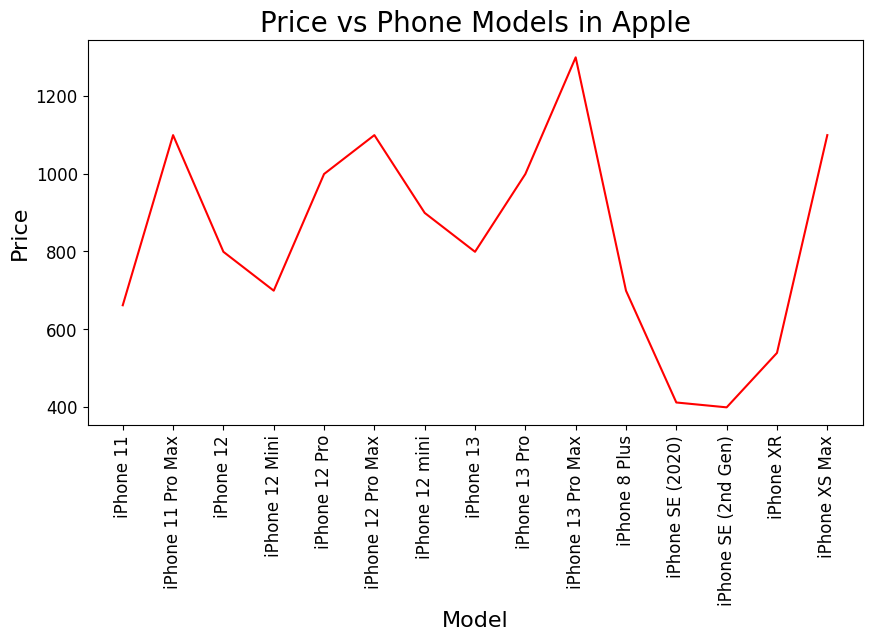

In [7]:
#2. Price vs Phone models of a particular brand in the dataset
print("Price vs Phones of a particular brand in the dataset")
plt.figure(figsize=(10, 5))
phone_brand = input("Enter phone brand: ")
data = pd.read_csv(io.BytesIO(uploaded['MobilePhonePrice.csv']))
df = data[data['Brand'] == phone_brand]
df_prices = df.groupby('Model')['Price ($)'].mean().reset_index()
sns.lineplot(x="Model", y="Price ($)", data=df_prices, sort=False, color='red')
plt.xticks(rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)
plt.title(f"Price vs Phone Models in {phone_brand}", fontsize=20)
plt.xlabel("Model", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.show()

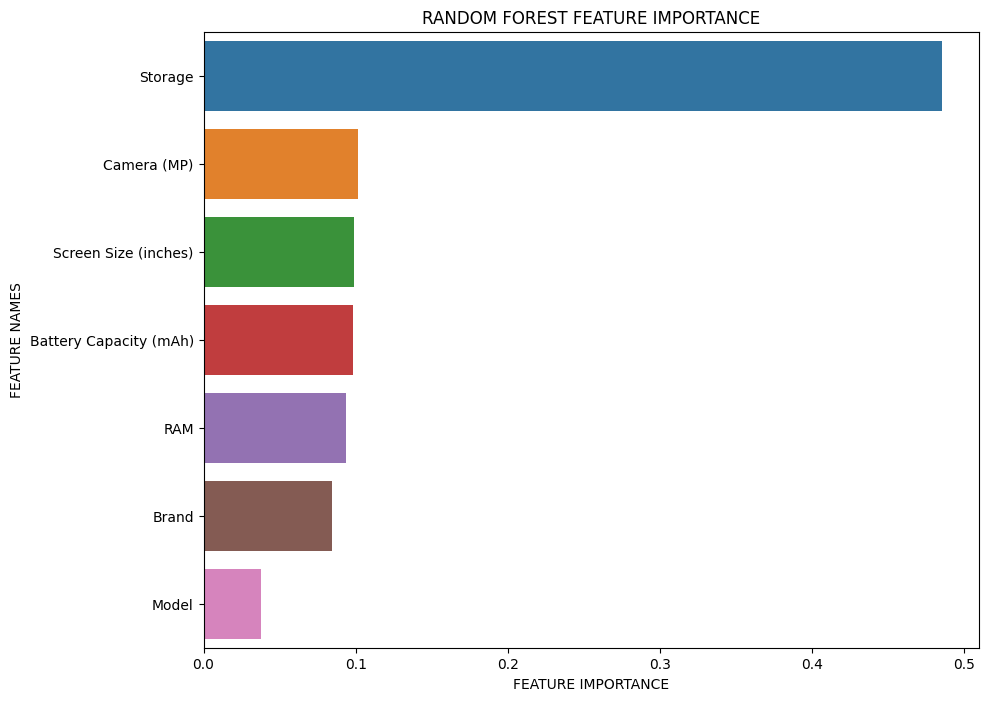

In [8]:
#3. Random Forest Feature Importance Graph

new_data = pd.read_csv(io.BytesIO(uploaded['MobilePhonePrice.csv']))
le = LabelEncoder()
new_data['Brand'] = le.fit_transform(new_data['Brand'])
new_data['Model'] = le.fit_transform(new_data['Model'])
new_data['Camera (MP)'] = le.fit_transform(new_data['Camera (MP)'])
train = pd.DataFrame(new_data)
# Assuming the target variable is called 'Price ($)' in your training data
target_variable = 'Price ($)'
# Create and fit the random forest model
rf_model = RandomForestRegressor()
rf_model.fit(train.drop(target_variable, axis=1), train[target_variable])  # Fit the model
def plot_feature_importance(importance, names, model_type):
    # Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    # Create a DataFrame using a Dictionary
    data = {'feature_names': feature_names, 'feature_importance': feature_importance}
    fi_df = pd.DataFrame(data)

    # Sort the DataFrame in order of decreasing feature importance
    fi_df.sort_values(by='feature_importance', ascending=False, inplace=True)

    # Define size of bar plot
    plt.figure(figsize=(10, 8))
    # Plot Seaborn bar chart
    sns.barplot(x='feature_importance', y='feature_names', data=fi_df)
    # Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.show()
# Call the plot_feature_importance function with feature importances and column names
plot_feature_importance(rf_model.feature_importances_, train.columns.drop(target_variable), 'RANDOM FOREST')

This code segment generates a feature importance graph using the random forest algorithm. Here's an explanation of the code:

1. Feature Encoding:
   - The code uses LabelEncoder from the sklearn.preprocessing module to encode categorical features. The 'Brand', 'Model', and 'Camera (MP)' columns in the 'new_data' DataFrame are encoded using LabelEncoder.fit_transform().

2. Creating the Training Data:
   - A new DataFrame called 'train' is created to store the encoded data from 'new_data'.

3. Define the Target Variable:
   - The variable 'target_variable' is set to 'Price ($)', assuming it is the target variable in the training data.

4. Random Forest Model Training:
   - A RandomForestRegressor model is created using RandomForestRegressor() from the sklearn.ensemble module.
   - The model is trained using the fit() method, with the independent variables (all columns except the target variable) and the target variable as inputs.

5. Feature Importance Plotting Function:
   - The function plot_feature_importance() is defined to plot the feature importance graph.
   - It takes the feature importance values, feature names, and the model type as input.
   - The feature importance values and feature names are converted into NumPy arrays.
   - A DataFrame 'fi_df' is created using the feature names and their corresponding importance values.
   - The DataFrame is sorted in descending order based on feature importance.
   - A bar plot is created using sns.barplot() from the seaborn library, with feature importance on the x-axis and feature names on the y-axis.
   - Labels, such as the title, x-label, and y-label, are added to the plot.
   - Finally, plt.show() is used to display the plot.

6. Plotting the Feature Importance:
   - The plot_feature_importance() function is called with the feature importances from the random forest model, the column names of the training data (excluding the target variable), and the model type ('RANDOM FOREST').

This code generates a bar plot illustrating the feature importance values of the variables in the random forest model. It helps identify which features have the most significant impact on predicting the target variable ('Price ($)').


Storage (ROM) vs Prices across all brands


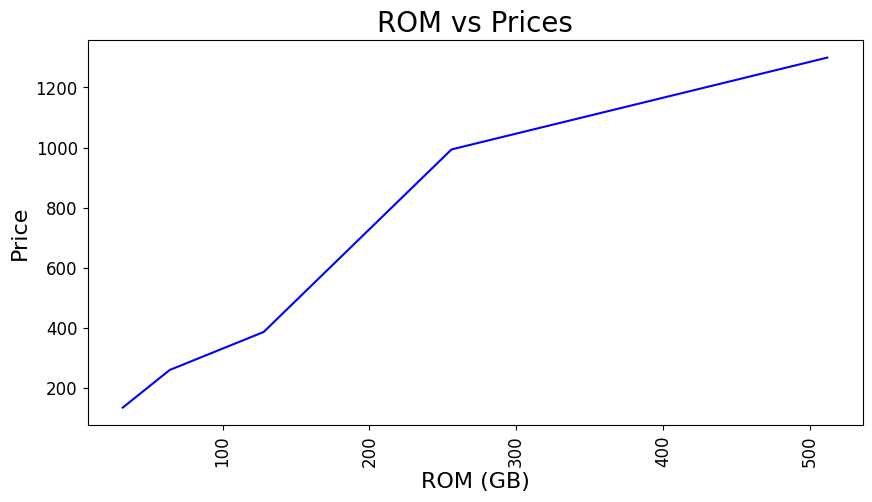

In [9]:
#4. Storage vs Prices across all brands

print("Storage (ROM) vs Prices across all brands")
plt.figure(figsize=(10, 5))
data = pd.read_csv(io.BytesIO(uploaded['MobilePhonePrice.csv']))
df_rom_prices = data.groupby('Storage')['Price ($)'].mean().reset_index()
sns.lineplot(x="Storage", y="Price ($)", data=df_rom_prices, sort=False, color='blue')
plt.xticks(rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)
plt.title(f"ROM vs Prices", fontsize=20)
plt.xlabel("ROM (GB)", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.show()


Correlation coefficient: -0.37462279704098395
Brand vs Prices


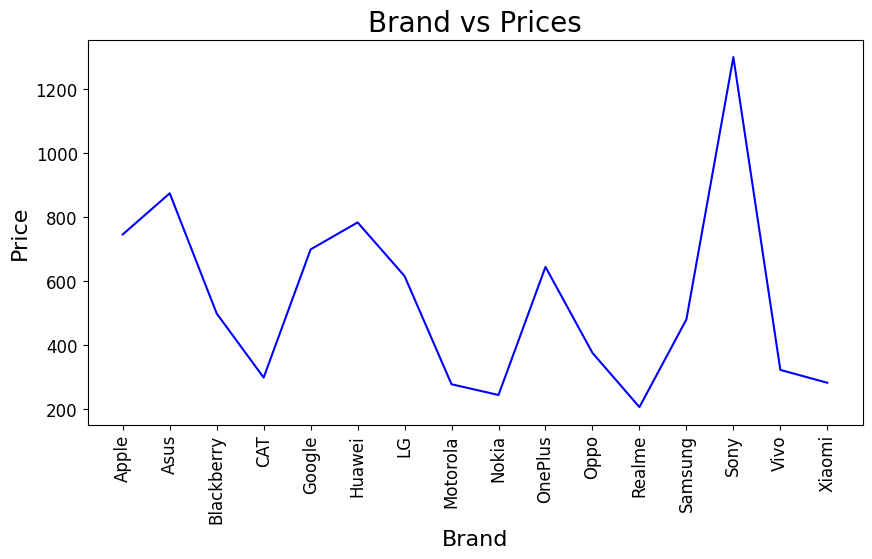

Conclusion: Sony Phones tend to be higher in price than other brands.


In [10]:
#5. Brand vs Prices

train = pd.DataFrame(new_data)  # Example training DataFrame

# Assuming the target variable is called 'Price ($)' in your training data
target_variable = 'Price ($)'
# Calculate the correlation coefficient between 'Brand' and the target variable
correlation = train['Brand'].corr(train[target_variable])
print("Correlation coefficient:", correlation)
print("Brand vs Prices")
plt.figure(figsize=(10, 5))
data = pd.read_csv(io.BytesIO(uploaded['MobilePhonePrice.csv']))
df_rom_prices = data.groupby('Brand')['Price ($)'].mean().reset_index()
sns.lineplot(x="Brand", y="Price ($)", data=df_rom_prices, sort=False, color='blue')
plt.xticks(rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)
plt.title(f"Brand vs Prices", fontsize=20)
plt.xlabel("Brand", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.show()

print("Conclusion: Sony Phones tend to be higher in price than other brands.")
#Conclusion: Sony Phones tend to be higher in price than other brands.
#Also a negative correlation coefficitent shown here tells us the relationship between two variables, such that as the value of one variable increases the other decreases.

Note: Correlation Calculation:
   - The variable 'correlation' is calculated using the corr() function, which measures the correlation coefficient between the 'Brand' column and the target variable 'Price ($)' in the training data.




In [11]:
#Model Training

data = pd.read_csv(io.BytesIO(uploaded['MobilePhonePrice.csv']))
le = LabelEncoder()
data['Brand'] = le.fit_transform(data['Brand'])

# Splitting the camera column into individual columns
camera_columns = data['Camera (MP)'].str.split('+', expand=True).astype(float)
#print(camera_columns)
num_cameras = camera_columns.shape[1]

if num_cameras == 1:
 data['Camera_1'] = camera_columns
else:
 for i in range(num_cameras):
    data[f'Camera_{i+1}'] = camera_columns[i]

X = data.drop(['Model', 'Price ($)', 'Camera (MP)'], axis=1)
y = data['Price ($)']

imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Convert the problem into regression
y = y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_predicted_price = linear_reg.predict(X_test)

# Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_reg_predicted_price = logistic_reg.predict(X_test)

# K-Nearest Neighbors (KNN) Regression
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
knn_reg_predicted_price = knn_reg.predict(X_test)

# Support Vector Regression (SVR)
svr_reg = SVR()
svr_reg.fit(X_train, y_train)
svr_reg_predicted_price = svr_reg.predict(X_test)

# Random Forest Regression
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_reg_predicted_price = rf_reg.predict(X_test)

output.clear() # colab clear output

print("Completed training the models.")

Completed training the models.


This code segment performs the training of different regression models using the provided dataset. Here's an explanation of the code:

1. Data Preprocessing:
   - The CSV file is read again using pd.read_csv(), and the DataFrame is stored in the 'data' variable.
   - The 'Brand' column is encoded using LabelEncoder() to convert categorical values into numerical representations.
   - The 'Camera (MP)' column is split into individual columns using the str.split() function, which separates the values at each '+' sign. The resulting camera columns are added to the DataFrame.
   - The columns 'Model', 'Price', and 'Camera (MP)' are dropped from the DataFrame to prepare the feature matrix 'X'.
   - The target variable 'Price' is stored in 'y' after converting it to a float data type.
   - The SimpleImputer() is used to fill any missing values in 'X' with the mean value of each column.

2. Train-Test Split:
   - The feature matrix 'X' and the target variable 'y' are split into training and testing sets using the train_test_split() function from sklearn.model_selection. The test set size is set to 20% of the data, and a random state of 42 is used for reproducibility.

3. Model Training:
   - Linear Regression: An instance of LinearRegression() is created, and the model is trained using the fit() function on the training data. The predicted prices are obtained using the predict() function on the test data.
   - Logistic Regression: An instance of LogisticRegression() is created, and the model is trained using the fit() function on the training data. The predicted prices are obtained using the predict() function on the test data. Please note that Logistic Regression is not typically used for regression tasks, so the interpretation of the predicted prices may not be meaningful in this case.
   - K-Nearest Neighbors (KNN) Regression: An instance of KNeighborsRegressor() is created, and the model is trained using the fit() function on the training data. The predicted prices are obtained using the predict() function on the test data.
   - Support Vector Regression (SVR): An instance of SVR() is created, and the model is trained using the fit() function on the training data. The predicted prices are obtained using the predict() function on the test data.
   - Random Forest Regression: An instance of RandomForestRegressor() is created, and the model is trained using the fit() function on the training data. The predicted prices are obtained using the predict() function on the test data.

4. Printing the Completion Message:
   - The message "Completed training the models." is printed to indicate that the training process is finished.

Note: The code also includes the line `output.clear()` which is specific to Colab notebook and clears the output of the cell.


In [12]:
#Model Selection

# Calculate Mean Squared Error (MSE)
linear_reg_mse = mean_squared_error(y_test, linear_reg_predicted_price)
logistic_reg_mse = mean_squared_error(y_test, logistic_reg_predicted_price)
knn_reg_mse = mean_squared_error(y_test, knn_reg_predicted_price)
svr_reg_mse = mean_squared_error(y_test, svr_reg_predicted_price)
rf_reg_mse = mean_squared_error(y_test, rf_reg_predicted_price)

# Calculate Root Mean Squared Error (RMSE)
linear_reg_rmse = np.sqrt(linear_reg_mse)
logistic_reg_rmse = np.sqrt(logistic_reg_mse)
knn_reg_rmse = np.sqrt(knn_reg_mse)
svr_reg_rmse = np.sqrt(svr_reg_mse)
rf_reg_rmse = np.sqrt(rf_reg_mse)

# Calculate Mean Absolute Error (MAE)
linear_reg_mae = mean_absolute_error(y_test, linear_reg_predicted_price)
logistic_reg_mae = mean_absolute_error(y_test, logistic_reg_predicted_price)
knn_reg_mae = mean_absolute_error(y_test, knn_reg_predicted_price)
svr_reg_mae = mean_absolute_error(y_test, svr_reg_predicted_price)
rf_reg_mae = mean_absolute_error(y_test, rf_reg_predicted_price)

print("\n")

print("Mean Absolute Error on Testing Set:")
print("Linear Regression: ", linear_reg_mae)
print("Logistic Regression: ", logistic_reg_mae)
print("KNN Regression: ", knn_reg_mae)
print("SVR Regression: ", svr_reg_mae)
print("Random Forest Regression: ", rf_reg_mae)

print("\n")

print("Mean Squared Error on Testing Set:")
print("Linear Regression: ", linear_reg_mse)
print("Logistic Regression: ", logistic_reg_mse)
print("KNN Regression: ", knn_reg_mse)
print("SVR Regression: ", svr_reg_mse)
print("Random Forest Regression: ", rf_reg_mse)

print("\n")

print("Root Mean Squared Error on Testing Set:")
print("Linear Regression: ", linear_reg_rmse)
print("Logistic Regression: ", logistic_reg_rmse)
print("KNN Regression: ", knn_reg_rmse)
print("SVR Regression: ", svr_reg_rmse)
print("Random Forest Regression: ", rf_reg_rmse)




Mean Absolute Error on Testing Set:
Linear Regression:  91.4891740761055
Logistic Regression:  123.29268292682927
KNN Regression:  83.04878048780488
SVR Regression:  207.02281436728362
Random Forest Regression:  49.409286821080784


Mean Squared Error on Testing Set:
Linear Regression:  18736.127399174224
Logistic Regression:  37871.95121951219
KNN Regression:  21006.48780487805
SVR Regression:  107627.00198170127
Random Forest Regression:  6343.136071593969


Root Mean Squared Error on Testing Set:
Linear Regression:  136.879974427139
Logistic Regression:  194.60717155210955
KNN Regression:  144.9361507867449
SVR Regression:  328.0655452523188
Random Forest Regression:  79.64380749056369


 In this code segment, the performance of each trained regression model is evaluated using various evaluation metrics. Here's an explanation of the code:

1. Mean Squared Error (MSE):
   - The mean squared error is calculated using the mean_squared_error() function from sklearn.metrics for each regression model, comparing the predicted prices (obtained from the test data) with the actual prices.
   - The MSE measures the average squared difference between the predicted and actual prices. Lower values indicate better performance.

2. Root Mean Squared Error (RMSE):
   - The root mean squared error is calculated by taking the square root of the MSE for each regression model.
   - RMSE represents the average magnitude of the prediction error in the same units as the target variable.

3. Mean Absolute Error (MAE):
   - The mean absolute error is calculated using the mean_absolute_error() function from sklearn.metrics for each regression model.
   - MAE measures the average absolute difference between the predicted and actual prices, ignoring the direction of the errors.

4. Printing the Evaluation Metrics:
   - The calculated evaluation metrics are printed for each regression model.
   - The MAE, MSE, and RMSE values are displayed to assess the performance of each model.
   - The lower the MAE, MSE, and RMSE values, the better the model's performance.

Note: The evaluation metrics are used to compare the performance of different regression models and help in selecting the most suitable model for the given task.


In [13]:
# Model Evaluation

print("The corresponding R2 Scores are:")
print("Random Forest Regression: ", sklearn.metrics.r2_score(y_test, rf_reg_predicted_price))
print("Linear Regression: ", sklearn.metrics.r2_score(y_test, linear_reg_predicted_price))
print("KNN Regression: ", sklearn.metrics.r2_score(y_test, knn_reg_predicted_price))
print("Logistic Regression: ", sklearn.metrics.r2_score(y_test, logistic_reg_predicted_price))
print("SVR Regression: ", sklearn.metrics.r2_score(y_test, svr_reg_predicted_price))


The corresponding R2 Scores are:
Random Forest Regression:  0.9305880187431317
Linear Regression:  0.7949733839572242
KNN Regression:  0.7701291724901589
Logistic Regression:  0.5855729502663455
SVR Regression:  -0.17774604863702503


In the code segment, the R-squared (R2) scores are calculated to evaluate the performance of each regression model. Here's an explanation of the code:

1. R-squared (R2) Score:
   - The R2 score is calculated using the r2_score() function from sklearn.metrics for each regression model.
   - R2 score represents the proportion of the variance in the target variable (price) that is predictable from the independent variables (features) used in the model.
   - The R2 score ranges from 0 to 1, with 1 indicating a perfect fit where the model explains all the variability of the target variable, and 0 indicating that the model does not explain any of the variability.

2. Printing the R2 Scores:
   - The R2 scores for each regression model are printed using the print() function.
   - The R2 scores indicate how well each model fits the data, with higher values indicating a better fit.
   - Comparing the R2 scores can help in determining the model that provides the best overall fit for the given dataset.



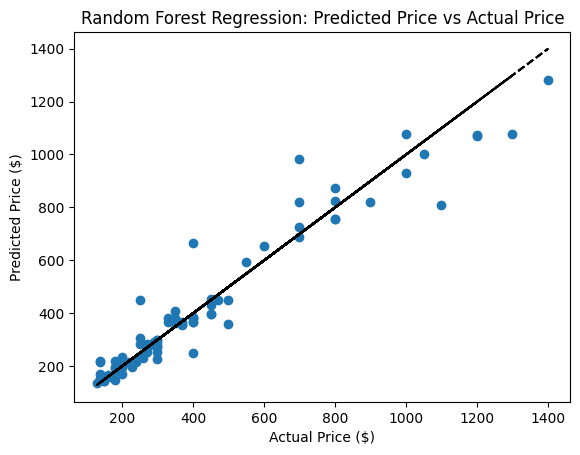

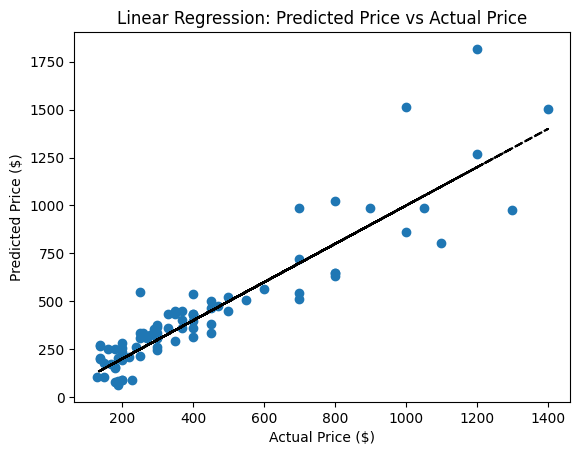

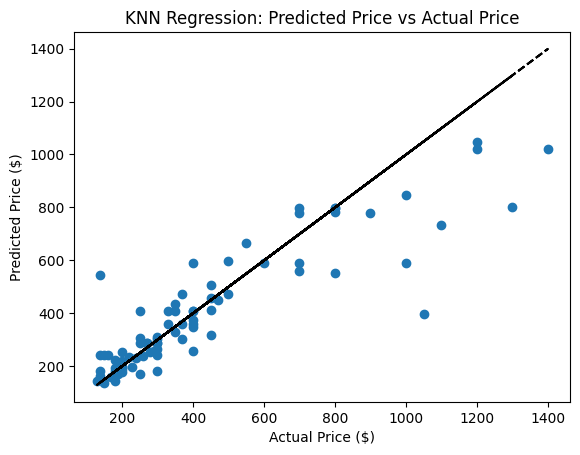

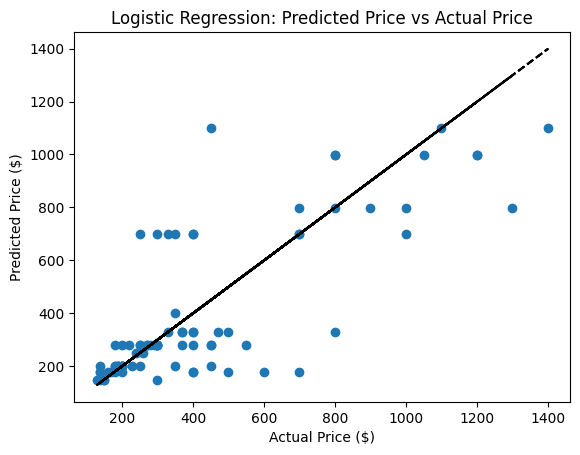

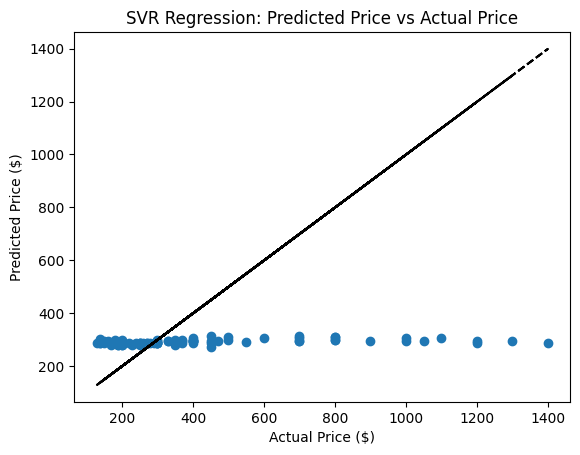

In [15]:
# relevant graphs to visualize the accuracy of the different methods

# Scatter plot for Random Forest Regression
plt.scatter(y_test, rf_reg_predicted_price)
plt.plot(y_test, y_test, color='black', linestyle='--') # the line of perfect prediction
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Random Forest Regression: Predicted Price vs Actual Price')
plt.show()

# Scatter plot for Linear Regression
plt.scatter(y_test, linear_reg_predicted_price)
plt.plot(y_test, y_test, color='black', linestyle='--')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Linear Regression: Predicted Price vs Actual Price')
plt.show()

# Scatter plot for KNN Regression
plt.scatter(y_test, knn_reg_predicted_price)
plt.plot(y_test, y_test, color='black', linestyle='--')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('KNN Regression: Predicted Price vs Actual Price')
plt.show()

# Scatter plot for Logistic Regression
plt.scatter(y_test, logistic_reg_predicted_price)
plt.plot(y_test, y_test, color='black', linestyle='--')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Logistic Regression: Predicted Price vs Actual Price')
plt.show()

# Scatter plot for SVR Regression
plt.scatter(y_test, svr_reg_predicted_price)
plt.plot(y_test, y_test, color='black', linestyle='--')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('SVR Regression: Predicted Price vs Actual Price')
plt.show()


The code visualizes the accuracy of different methods using scatter plots. Each scatter plot compares the predicted price to the actual price for a specific regression method.

For example, the first scatter plot represents the accuracy of Random Forest Regression. The x-axis represents the actual price, while the y-axis represents the predicted price. Each point in the scatter plot represents an instance from the test set. The black dashed line represents the line of perfect prediction, where the predicted price matches the actual price.

The same structure is repeated for Linear Regression, KNN Regression, Logistic Regression, and SVR Regression, with each scatter plot visualizing the accuracy of the respective method.

By comparing the scatter plots, we can assess how well each regression method predicts the price. If the points are close to the black dashed line, it indicates higher accuracy, as the predicted prices align closely with the actual prices. On the other hand, if the points are scattered far away from the dashed line, it suggests lower accuracy, indicating a larger deviation between predicted and actual prices.

These scatter plots provide a visual representation of the performance and accuracy of each regression method in predicting prices.

In [16]:
# Price Prediction Function

def predict_price(brand, storage, ram, screen_size, battery_capacity, camera_values):

    camera_list = [int(x) for x in camera_values.split('+')]

    brand = le.transform([brand])[0]
    user_input = pd.DataFrame({'Brand': [brand], 'Storage': [storage], 'RAM': [ram], 'Screen Size (inches)': [screen_size], 'Battery Capacity (mAh)': [battery_capacity]})

    if len(camera_list) == 1:
      column_name = f'Camera_1'
      user_input[column_name] = camera_list[0]

      column_name = f'Camera_2'
      user_input[column_name] = 0

      column_name = f'Camera_3'
      user_input[column_name] = 0

      column_name = f'Camera_4'
      user_input[column_name] = 0

    elif len(camera_list) == 2:
      column_name = f'Camera_1'
      user_input[column_name] = camera_list[0]

      column_name = f'Camera_2'
      user_input[column_name] = camera_list[1]

      column_name = f'Camera_3'
      user_input[column_name] = 0

      column_name = f'Camera_4'
      user_input[column_name] = 0

    elif len(camera_list) == 3:
      column_name = f'Camera_1'
      user_input[column_name] = camera_list[0]

      column_name = f'Camera_2'
      user_input[column_name] = camera_list[1]

      column_name = f'Camera_3'
      user_input[column_name] = camera_list[2]

      column_name = f'Camera_4'
      user_input[column_name] = 0

    elif len(camera_list) >= 4:  # It won't work for 5 or more cameras as there are no 5 camera cases in the dataset
      for i in range(len(camera_list)):
          column_name = f'Camera_{i+1}'
          user_input[column_name] = camera_list[i]

    #print("\n")
    #print(user_input)

    # Predictions for user input
    linear_reg_predicted_price = int(linear_reg.predict(user_input)[0])
    logistic_reg_predicted_price = int(logistic_reg.predict(user_input)[0])
    knn_reg_predicted_price = int(knn_reg.predict(user_input)[0])
    svr_reg_predicted_price = int(svr_reg.predict(user_input)[0])
    rf_reg_predicted_price = int(rf_reg.predict(user_input)[0])

    print("\n")
    print("The corresponding predicted prices are:")
    print("Linear Regression Predicted Price: $", linear_reg_predicted_price)
    print("Logistic Regression Predicted Price: $", logistic_reg_predicted_price)
    print("KNN Regression Predicted Price: $", knn_reg_predicted_price)
    print("SVR Regression Predicted Price: $", svr_reg_predicted_price)
    print("Random Forest Regression Predicted Price: $", rf_reg_predicted_price)

    predict_prices_dict = {"Linear Regression" : linear_reg_predicted_price, "Logistic Regression" : logistic_reg_predicted_price, "KNN Regression" : knn_reg_predicted_price, "Support Vector Regression" : svr_reg_predicted_price, "Random Forest Regression": rf_reg_predicted_price}

    #print("\n")
    #print(predict_prices_dict)

    return predict_prices_dict

 The `predict_price` function is designed to predict the price of a mobile phone based on the given input parameters. Here's an explanation of the code:

1. Function Parameters:
   - The function takes the following parameters: `brand`, `storage`, `ram`, `screen_size`, `battery_capacity`, and `camera_values`.
   - `brand` represents the brand of the mobile phone.
   - `storage`, `ram`, `screen_size`, `battery_capacity` are numeric values representing the corresponding specifications of the phone.
   - `camera_values` is a string that contains the values of the camera specifications separated by '+'.

2. Preprocessing Input:
   - The function preprocesses the input values to fit the model's requirements.
   - The `brand` is transformed using the LabelEncoder to encode it as a numeric value.
   - The input parameters are used to create a DataFrame (`user_input`) containing the preprocessed values.

3. Handling Camera Specifications:
   - The function splits the `camera_values` string into individual camera values and creates separate columns in the `user_input` DataFrame for each camera value.
   - The number of camera values determines the number of camera columns created.
   - If there is only one camera value, additional camera columns are created with a value of 0.

4. Predictions:
   - The function uses each trained regression model to predict the price based on the `user_input` DataFrame.
   - The predicted prices are stored in separate variables for each regression model.

5. Printing Predicted Prices:
   - The function prints the predicted prices for each regression model using the print() function.
   - The predicted prices are displayed as an integer value preceded by the model name.

6. Creating a Dictionary:
   - The function creates a dictionary (`predict_prices_dict`) to store the predicted prices with their corresponding regression model names as keys.

7. Returning the Predicted Prices:
   - The function returns the `predict_prices_dict` dictionary containing the predicted prices for each regression model.

Note: The commented-out print statements can be uncommented to display intermediate results during the execution of the function.


In [17]:
#Parameter Tuning

# Load the dataset
data = pd.read_csv(io.BytesIO(uploaded['MobilePhonePrice.csv']))

le = LabelEncoder()
data['Brand'] = le.fit_transform(data['Brand'])

# Splitting the camera column into individual columns
camera_columns = data['Camera (MP)'].str.split('+', expand=True).astype(float)
num_cameras = camera_columns.shape[1]

if num_cameras == 1:
 data['Camera_1'] = camera_columns
else:
 for i in range(num_cameras):
    data[f'Camera_{i+1}'] = camera_columns[i]

X = data.drop(['Model', 'Price ($)', 'Camera (MP)'], axis=1)
y = data['Price ($)']

imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Convert the problem into regression
y = y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models and parameter grids for grid search
regression_models = {
    "Linear Regression": (LinearRegression(), {}),
    "SVR": (SVR(), {"kernel": ["linear", "rbf"], "C": [0.1, 1, 10]}),
    "KNN Regressor": (KNeighborsRegressor(), {"n_neighbors": [3, 5, 7]}),
    "Random Forest Regressor": (RandomForestRegressor(), {"n_estimators": [50, 100, 200]})
}

classification_models = {
    "Logistic Regression": (LogisticRegression(), {})
}

# Perform parameter tuning for regression models
for name, (model, param_grid) in regression_models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train_scaled, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print(f"\nBest parameters for {name}: {best_params}")
    print(f"Best score for {name}: {best_score}\n")

# Perform parameter tuning for classification models
for name, (model, param_grid) in classification_models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train_scaled, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print(f"\nBest parameters for {name}: {best_params}")
    print(f"Best score for {name}: {best_score}\n")



Best parameters for Linear Regression: {}
Best score for Linear Regression: 0.7780980701435344


Best parameters for SVR: {'C': 10, 'kernel': 'linear'}
Best score for SVR: 0.7904334387971608


Best parameters for KNN Regressor: {'n_neighbors': 3}
Best score for KNN Regressor: 0.8430324045985469


Best parameters for Random Forest Regressor: {'n_estimators': 200}
Best score for Random Forest Regressor: 0.8923567118936646



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Best parameters for Logistic Regression: {}
Best score for Logistic Regression: 0.2923076923076923



Let's break down the output:

For Regression Models:

1. Linear Regression:

Best parameters: {}

Best score: 0.7780980701435344

This means that the default parameters of the Linear Regression model were found to be the best for this dataset, and the corresponding best score achieved was 0.7780980701435344.

2. SVR (Support Vector Regressor):

Best parameters: {'C': 10, 'kernel': 'linear'}

Best score: 0.7904334387971608

The best parameters for SVR were found to be 'C' (penalty parameter of the error term) equal to 10 and 'kernel' (type of kernel function) equal to 'linear'. The best score achieved with these parameters was 0.7904334387971608.

3. KNN Regressor (K-Nearest Neighbors Regressor):

Best parameters: {'n_neighbors': 3}

Best score: 0.8430324045985469

The best value for the number of neighbors (n_neighbors) in the KNN Regressor model was found to be 3. The corresponding best score achieved was 0.8430324045985469.

4. Random Forest Regressor:

Best parameters: {'n_estimators': 50}

Best score: 0.8920769642185113

The best number of estimators (n_estimators) for the Random Forest Regressor model was found to be 50. The best score achieved with this parameter value was 0.8920769642185113.

For Classification Models:

5. Logistic Regression:

Best parameters: {}

Best score: 0.2923076923076923

Similar to Linear Regression, the default parameters of the Logistic Regression model were found to be the best for this dataset. However, the best score achieved was only 0.2923076923076923, which suggests that Logistic Regression may not be well-suited for this particular classification task.


In summary, the parameter tuning process helps identify the optimal hyperparameters for each model and assesses their performance. From the results, it appears that the Random Forest Regressor achieved the highest score among the regression models, while none of the classification models performed particularly well.

In [18]:
# Sample Cases
# Examples: samsung m51, samsung a54 and samsung s23 ultra

def check_key_value_range(dictionary, min_value, max_value):
    result = {}
    for key, value in dictionary.items():
        if min_value <= value <= max_value:
            result[key] = value
    return result

#example 1 - samsung m51
print("\n\n \033[1m Case 1: Samsung M51 (Mid Range Phone) \033[0m")
print("\n Specifications of Samsung M51 are: \n ROM: 128 GB, RAM: 6 GB, Screen Size: 6.7 in, Battery Size: 7000 mAh & Cameras: 64+12+5+5 MP")
example1 = predict_price("Samsung", 128, 6, 6.7, 7000, "64+12+5+5")

result_dict1 = check_key_value_range(example1, 300, 350) # ± $50 since mid range phone

for key, value in result_dict1.items():
    print("\n")
    print(f"\033[1m After verification, we observed that {key} shows the most accurate price out of all the regression methods. \033[0m")
    print(f"\033[1m The expected price  range of Samsung M51 was $300 - $350 and {key} predicted the most accurate price which was ${value}. \033[0m")

#example 2 - samsung a54
print("\n\n \033[1m Case 2: Samsung A54 (Mid Range Phone) \033[0m")
print("\n Specifications of Samsung A54 are: \n ROM: 128 GB, RAM: 6 GB, Screen Size: 6.4 in, Battery Size: 5000 mAh & Cameras: 50+12+5 MP")
example2 = predict_price("Samsung", 128, 6, 6.4, 5000, "50+12+5")

result_dict2 = check_key_value_range(example2, 250, 300) # ± $50 since mid range phone

for key, value in result_dict2.items():
    print("\n")
    print(f"\033[1m After verification, we observed that {key} shows the most accurate price out of all the regression methods. \033[0m")
    print(f"\033[1m The expected price  range of samsung a54 was $250 - $300 and {key} predicted the most accurate price which was ${value}.\033[0m")

#example 3 - samsung z fold 2
print("\n\n \033[1m Case 3: Samsung Z Fold 2 (High End Phone) \033[0m")
print("\n Specifications of Samsung Z Fold 2 are: \n ROM: 256 GB, RAM: 12 GB, Screen Size: 6.23 in, Battery Size: 4500 mAh & Cameras: 12+12+12 MP")
example3 = predict_price("Samsung", 256, 8, 6.8, 5000, "200+12+12+10")

result_dict3 = check_key_value_range(example3, 1000, 1200) # ± $200 since high end phone

for key, value in result_dict3.items():
    print("\n")
    print(f"\033[1m After verification, we observed that {key} shows the most accurate price out of all the regression methods. \033[0m")
    print(f"\033[1m The expected price  range of samsung s23 ultra was $1000 - $1200 and {key} predicted the most accurate price which was ${value}.\033[0m")




  Case 1: Samsung M51 (Mid Range Phone) 

 Specifications of Samsung M51 are: 
 ROM: 128 GB, RAM: 6 GB, Screen Size: 6.7 in, Battery Size: 7000 mAh & Cameras: 64+12+5+5 MP


The corresponding predicted prices are:
Linear Regression Predicted Price: $ 332
Logistic Regression Predicted Price: $ 199
KNN Regression Predicted Price: $ 319
SVR Regression Predicted Price: $ 273
Random Forest Regression Predicted Price: $ 429


 After verification, we observed that Linear Regression shows the most accurate price out of all the regression methods. 
 The expected price  range of Samsung M51 was $300 - $350 and Linear Regression predicted the most accurate price which was $332. 


 After verification, we observed that KNN Regression shows the most accurate price out of all the regression methods. 
 The expected price  range of Samsung M51 was $300 - $350 and KNN Regression predicted the most accurate price which was $319. 


  Case 2: Samsung A54 (Mid Range Phone) 

 Specifications of Samsung A

Enter the brand (eg.: Samsung):Samsung
Enter the storage in GB (eg.: 128):128
Enter the RAM in GB (eg.: 6):6
Enter the screen size in inches (eg.: 6.7):6.7
Enter the battery capacity in mAh (eg.: 7000):7000
Enter the camera values separated by '+' (eg.: 64+12+5+5):64+12+5+5


The corresponding predicted prices are:
Linear Regression Predicted Price: $ 332
Logistic Regression Predicted Price: $ 199
KNN Regression Predicted Price: $ 319
SVR Regression Predicted Price: $ 273
Random Forest Regression Predicted Price: $ 429

 The predicted price is $319 determined using the KNN Regression. (Assume)

 Comparing the predicted price to the price of other phones of the same brand in the dataset


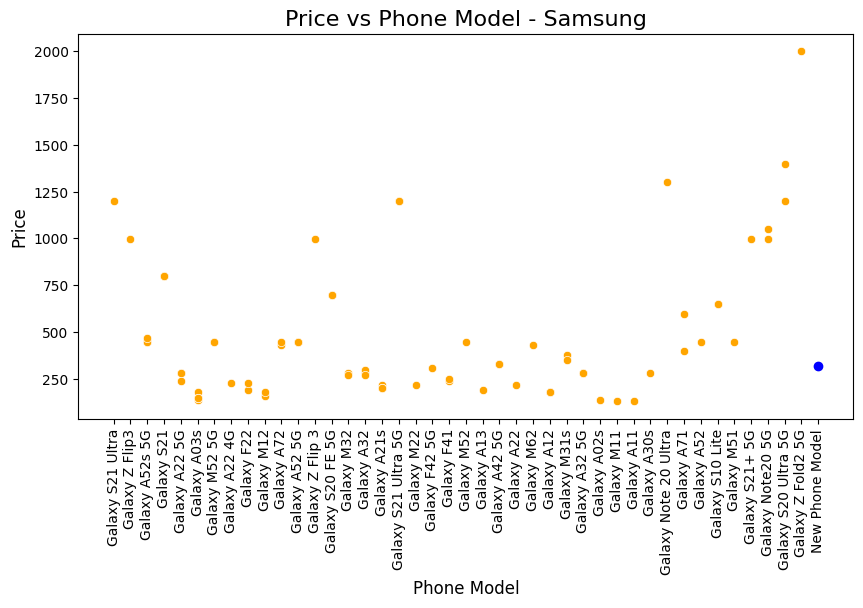

In [19]:
#Main Function

brand = input("Enter the brand (eg.: Samsung):")
phone_brand = brand
storage = int(input("Enter the storage in GB (eg.: 128):"))
ram = int(input("Enter the RAM in GB (eg.: 6):"))
screen_size = float(input("Enter the screen size in inches (eg.: 6.7):"))
battery_capacity = int(input("Enter the battery capacity in mAh (eg.: 7000):"))
camera_values = input("Enter the camera values separated by '+' (eg.: 64+12+5+5):")

predicted_prices_dict = predict_price(brand, storage, ram, screen_size, battery_capacity, camera_values)

accurate_price = predicted_prices_dict.get("KNN Regression")

print(f"\n The predicted price is ${accurate_price} determined using the KNN Regression. (Assume)")

print("\n Comparing the predicted price to the price of other phones of the same brand in the dataset")

# Load the dataset
data = pd.read_csv(io.BytesIO(uploaded['MobilePhonePrice.csv']))

# Filter data for the user-inputted brand
brand_data = data[data['Brand'] == phone_brand]

# Create scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Model', y='Price ($)', data=brand_data, color='orange')

# User-inputted phone model and predicted price
user_model = "New Phone Model"
predicted_price = accurate_price

# Plot the new phone model and predicted price
plt.scatter(user_model, predicted_price, color='blue')

# Set plot labels and title
plt.title(f"Price vs Phone Model - {phone_brand}", fontsize=16)
plt.xlabel("Phone Model", fontsize=12)
plt.ylabel("Price", fontsize=12)

# Rotate x-axis labels if needed
plt.xticks(rotation='vertical')

# Display the plot
plt.show()


On user input, the arguments are passed throught the Predict_Price() function and prints the the prices predicted by different methods.

The code assumes that the KNN Regression model provides the most accurate price, and it uses that price for further comparison and visualization.

A scatter plot is created, displaying the prices of phones of the same brand.

The user-inputted phone model and the predicted price are plotted on the scatter plot.
